In [56]:
import numpy
from sklearn import preprocessing
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.optimizers import Adagrad
from keras.layers import BatchNormalization

In [2]:
trainingDataMerged = pandas.read_csv('training_Merged.csv')
trainingDataMerged.head()
trainingDataMerged = trainingDataMerged.drop(columns="VDS_Combination")
trainingDataMerged.head()
X = trainingDataMerged.drop(columns = "AdoptionSpeed")
Y = trainingDataMerged["AdoptionSpeed"]

In [3]:
Y0 = Y[Y==0];
Y[Y0.index] = 1;
Y
Y4 = Y[Y==4];
Y[Y4.index] = 3;
Y

0        2
1        1
2        3
3        2
4        2
5        2
6        1
7        3
8        1
9        3
10       1
11       1
12       2
13       1
14       2
15       3
16       3
17       3
18       2
19       3
20       2
21       3
22       3
23       3
24       1
25       2
26       1
27       2
28       3
29       2
        ..
14963    1
14964    3
14965    1
14966    2
14967    1
14968    3
14969    3
14970    3
14971    3
14972    1
14973    2
14974    2
14975    3
14976    3
14977    3
14978    3
14979    3
14980    3
14981    3
14982    3
14983    2
14984    3
14985    3
14986    3
14987    1
14988    2
14989    3
14990    3
14991    3
14992    3
Name: AdoptionSpeed, Length: 14993, dtype: int64

In [17]:
Y1 = pandas.get_dummies(Y)
trainSplit = round(X.shape[0] *0.8)
XTrain = X[1:trainSplit];
YTrain = Y1[1:trainSplit];
YTrain1 = Y[1:trainSplit];
XTest = X[(trainSplit+1):14993];
YTest = Y[(trainSplit+1):14993];
YTest1 = Y1[1:trainSplit];

(array([3500.,    0.,    0.,    0.,    0., 4037.,    0.,    0.,    0.,
        7456.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

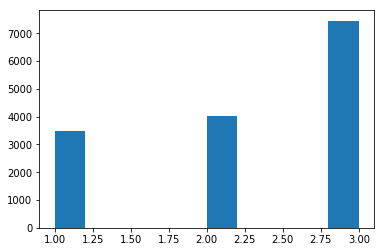

In [5]:
plt.hist(Y)

In [6]:
Y1.head()

1  2  3
0  0  1  0
1  1  0  0
2  0  0  1
3  0  1  0
4  0  1  0

In [62]:
#changed according to the results of the gs optimization below
dropout_rate=0.1;
model = Sequential()
model.add(Dense(50, input_dim=48, kernel_initializer='zero',activation='sigmoid'))
model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
model.add(Dense(50, kernel_initializer='zero',activation='selu'))
model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))          
model.add(Dense(30, kernel_initializer='zero',activation='softplus'))
model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
model.add(Dense(3, kernel_initializer='zero',activation='softmax'))
optimizer = Adagrad(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_crossentropy'])
model.fit(XTrain, YTrain, epochs=350, batch_size=10);

Epoch 1/350
11993/11993 [==============================] - 3s 285us/step - loss: 1.0479 - categorical_crossentropy: 1.0479
Epoch 2/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0412 - categorical_crossentropy: 1.0412
Epoch 3/350
11993/11993 [==============================] - 2s 161us/step - loss: 1.0404 - categorical_crossentropy: 1.0404
Epoch 4/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0402 - categorical_crossentropy: 1.0402
Epoch 5/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0395 - categorical_crossentropy: 1.0395
Epoch 6/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0393 - categorical_crossentropy: 1.0393
Epoch 7/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0393 - categorical_crossentropy: 1.0393
Epoch 8/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0391 - categorical_crossentropy: 1.0391
Epoch 9/350
1199

11993/11993 [==============================] - 2s 157us/step - loss: 1.0384 - categorical_crossentropy: 1.0384
Epoch 132/350
11993/11993 [==============================] - 2s 159us/step - loss: 1.0383 - categorical_crossentropy: 1.0383
Epoch 133/350
11993/11993 [==============================] - 2s 159us/step - loss: 1.0385 - categorical_crossentropy: 1.0385
Epoch 134/350
11993/11993 [==============================] - 2s 158us/step - loss: 1.0382 - categorical_crossentropy: 1.0382
Epoch 135/350
11993/11993 [==============================] - 2s 158us/step - loss: 1.0383 - categorical_crossentropy: 1.0383
Epoch 136/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0384 - categorical_crossentropy: 1.0384
Epoch 137/350
11993/11993 [==============================] - 2s 159us/step - loss: 1.0382 - categorical_crossentropy: 1.0382
Epoch 138/350
11993/11993 [==============================] - 2s 157us/step - loss: 1.0382 - categorical_crossentropy: 1.0382
Epoch 139/350


11993/11993 [==============================] - 2s 158us/step - loss: 1.0382 - categorical_crossentropy: 1.0382
Epoch 262/350
11993/11993 [==============================] - 2s 158us/step - loss: 1.0383 - categorical_crossentropy: 1.0383
Epoch 263/350
11993/11993 [==============================] - 2s 159us/step - loss: 1.0384 - categorical_crossentropy: 1.0384
Epoch 264/350
11993/11993 [==============================] - 2s 161us/step - loss: 1.0383 - categorical_crossentropy: 1.0383
Epoch 265/350
11993/11993 [==============================] - 2s 158us/step - loss: 1.0383 - categorical_crossentropy: 1.0383
Epoch 266/350
11993/11993 [==============================] - 2s 160us/step - loss: 1.0382 - categorical_crossentropy: 1.0382
Epoch 267/350
11993/11993 [==============================] - 2s 161us/step - loss: 1.0384 - categorical_crossentropy: 1.0384
Epoch 268/350
11993/11993 [==============================] - 2s 161us/step - loss: 1.0384 - categorical_crossentropy: 1.0384
Epoch 269/350


In [63]:
Ypred = model.predict(XTest)
Ypred = numpy.argmax(Ypred, axis=1)
Ypred = Ypred + 1;

(array([   0.,    0.,    0.,    0.,    0., 2998.,    0.,    0.,    0.,
           0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

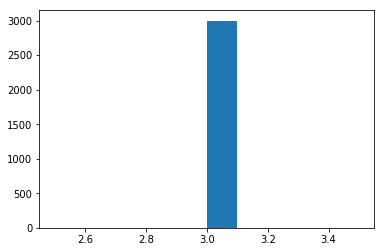

In [64]:
plt.hist(Ypred)

(array([ 732.,    0.,    0.,    0.,    0.,  807.,    0.,    0.,    0.,
        1459.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

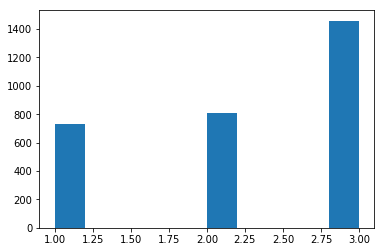

In [65]:
plt.hist(YTest)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(YTest, Ypred)

array([[   0,    0,  732],
       [   0,    0,  807],
       [   0,    0, 1459]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(YTest, Ypred)

0.4866577718478986

In [27]:
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid1 = dict(dropout_rate=dropout_rate)

In [57]:
def generateModel1(init_mode='uniform',activation='relu',dropout_rate=0.0, weight_constraint=0,learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(50, input_dim=48,kernel_initializer=init_mode,activation='sigmoid'))
    model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
    model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
    model.add(Dense(50, kernel_initializer=init_mode,activation='selu'))
    model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
    model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))          
    model.add(Dense(30, kernel_initializer=init_mode,activation='softplus'))
    model.add(Dropout(dropout_rate, noise_shape=None, seed=None))
    model.add(BatchNormalization(axis=-1,momentum=0.99, epsilon=0.001))
    model.add(Dense(3,kernel_initializer=init_mode, activation='softmax'))
    optimizer = Adagrad(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [58]:
model1 = KerasClassifier(build_fn = generateModel1, verbose= 0)

In [20]:
grid = GridSearchCV(estimator=model1, param_grid=param_grid1, scoring = 'accuracy',n_jobs=-1)
grid_result = grid.fit(XTrain, YTrain1)

In [21]:
grid_result.best_score_

0.5012090386058534

In [25]:
grid_result.best_params_

{'dropout_rate': 0.1}

In [28]:
batch_size = [10, 20, 40, 60, 80, 100]
param_grid2 = dict(batch_size=batch_size)

In [29]:
grid2 = GridSearchCV(estimator=model1, param_grid=param_grid2, scoring = 'accuracy',n_jobs=-1)
grid_result2 = grid2.fit(XTrain, YTrain1)

C:\Users\mania\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [30]:
grid_result2.best_score_

0.4919536396231135

In [31]:
grid_result2.best_params_

{'batch_size': 10}

In [43]:
optimizer = ['SGD','RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid3 = dict(optimizer=optimizer)

In [42]:
grid3 = GridSearchCV(estimator=model1, param_grid=param_grid3, scoring = 'accuracy',n_jobs=-1)
grid_result3 = grid3.fit(XTrain, YTrain1)

KeyboardInterrupt: 

In [38]:
grid_result3.best_score_

0.4958725923455349

In [39]:
grid_result3.best_params_

{'optimizer': 'Adagrad'}

In [44]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid4 = dict(init_mode=init_mode)

In [47]:
grid4 = GridSearchCV(estimator=model1, param_grid=param_grid4, scoring = 'accuracy',n_jobs=-1)
grid_result4 = grid4.fit(XTrain, YTrain1)

In [48]:
grid_result4.best_score_

0.5000416909864087

In [49]:
grid_result4.best_params_

{'init_mode': 'zero'}

In [52]:
learn_rate  = [0.001, 0.005,  0.01, 0.05, 0.1, 0.5]
param_grid5 = dict(learn_rate=learn_rate)

In [59]:
grid5 = GridSearchCV(estimator=model1, param_grid=param_grid5, scoring = 'accuracy',n_jobs=-1)
grid_result5 = grid5.fit(XTrain, YTrain1)

In [60]:
grid_result5.best_score_

0.5021262403068456

In [61]:
grid_result5.best_params_

{'learn_rate': 0.05}